# 1. モジュールインポート

In [1]:
import pandas as pd
import glob
import os
from tqdm.notebook import tqdm

from modules.constants import LocalPaths
from modules.constants import HorseResultsCols
from modules import preparing
from modules import preprocessing
from modules import training
from modules import simulation
from modules import policies
%load_ext autoreload

# 2. データ取得

## 2.1. レースID取得
例として、2020年のレースデータを取得する場合を考える

In [4]:
%autoreload

In [2]:
#開催日取得。to_の月は含まないので注意。
kaisai_date_2020 = preparing.scrape_kaisai_date(from_="2020-01-01", to_="2021-01-01")
len(kaisai_date_2020)

getting race date from 2020-01-01 to 2021-01-01


  0%|          | 0/12 [00:00<?, ?it/s]

109

In [5]:
# 開催日からレースIDの取得
race_id_list = preparing.scrape_race_id_list(kaisai_date_2020)
len(race_id_list)

getting race_id_list


  0%|          | 0/109 [00:00<?, ?it/s]

scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200105
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200106
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200111
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200112
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200113
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200118
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200119
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200125
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200126
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200201
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200202
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200208
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20200209
scraping: ht

3456

## 2.2. /race/ディレクトリのデータ取得

In [7]:
#https://db.netkeiba.com/race/のhtml(binファイル)をスクレイピングして保存
html_files_race = preparing.scrape_html_race(race_id_list, skip=True)
html_files_race[:5]

  0%|          | 0/10 [00:00<?, ?it/s]

race_id 202106010101 skipped
race_id 202106010102 skipped
race_id 202106010103 skipped
race_id 202106010104 skipped
race_id 202106010105 skipped
race_id 202106010106 skipped
race_id 202106010107 skipped
race_id 202106010108 skipped
race_id 202106010109 skipped
race_id 202106010110 skipped


['/Users/chiyoda/Documents/readers-repo/data/html/race/202106010101.bin',
 '/Users/chiyoda/Documents/readers-repo/data/html/race/202106010102.bin',
 '/Users/chiyoda/Documents/readers-repo/data/html/race/202106010103.bin',
 '/Users/chiyoda/Documents/readers-repo/data/html/race/202106010104.bin',
 '/Users/chiyoda/Documents/readers-repo/data/html/race/202106010105.bin']

In [8]:
results_new = preparing.get_rawdata_results(html_files_race) #レース結果テーブルの作成
race_info_new = preparing.get_rawdata_info(html_files_race) #レース情報テーブルの作成
return_tables_new = preparing.get_rawdata_return(html_files_race) #払戻テーブルの作成

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# テーブルの更新。元々のテーブルが存在しない場合は、新たに作成される。
preparing.update_rawdata(filepath=LocalPaths.RAW_RESULTS_PATH, new_df=results_new)
preparing.update_rawdata(filepath=LocalPaths.RAW_RACE_INFO_PATH, new_df=race_info_new)
preparing.update_rawdata(filepath=LocalPaths.RAW_RETURN_TABLES_PATH, new_df=return_tables_new)

## 2.3. /horse/ディレクトリのデータ取得

In [16]:
%autoreload

In [18]:
horse_id_list = results_new['horse_id'].unique()
#htmlをスクレイピング
#すでにスクレイピングしてある馬をスキップしたい場合はskip=Trueにする
#すでにスクレイピングしてある馬でも、新たに出走した成績を更新したい場合はskip=Falseにする
html_files_horse = preparing.scrape_html_horse_with_master(
    horse_id_list, skip=True
    )

scraping


  0%|          | 0/11398 [00:00<?, ?it/s]

horse_id 2015104603 skipped
horse_id 2015105549 skipped
horse_id 2015102342 skipped
horse_id 2015100933 skipped
horse_id 2015101022 skipped
horse_id 2015102419 skipped
horse_id 2015105621 skipped
horse_id 2015105800 skipped
horse_id 2015104474 skipped
horse_id 2015103929 skipped
horse_id 2015100339 skipped
horse_id 2015104336 skipped
horse_id 2015102908 skipped
horse_id 2015106192 skipped
horse_id 2015109150 skipped
horse_id 2015104834 skipped
horse_id 2015103859 skipped
horse_id 2014102886 skipped
horse_id 2014104214 skipped
horse_id 2013105161 skipped
horse_id 2013103739 skipped
horse_id 2014104550 skipped
horse_id 2014100779 skipped
horse_id 2014105398 skipped
horse_id 2014103417 skipped
horse_id 2015104752 skipped
horse_id 2015101028 skipped
horse_id 2015104408 skipped
horse_id 2015104271 skipped
horse_id 2015106094 skipped
horse_id 2015100244 skipped
horse_id 2015103112 skipped
horse_id 2015102242 skipped
horse_id 2015105018 skipped
horse_id 2015100299 skipped
horse_id 2015102983 

In [19]:
#追加で新たにスクレイピングされた数
len(html_files_horse)

4742

In [22]:
### scrape関数を実行せずに、保存してあるhtmlのパスを取得する場合、以下を実行 ###

"""target_date = '2022-06-25' #スクレイピングした日付を指定
# マスタの読み込み
update_master = pd.read_csv(
    os.path.join(LocalPaths.MASTER_DIR, 'horse_results_updated_at.csv'),
    dtype=object
    )
# target_dateにスクレイピングしたhorse_idに絞り込む
filter = pd.to_datetime(update_master['updated_at']).dt.strftime('%Y-%m-%d') == target_date
horse_id_list = update_master[filter]['horse_id']

# binファイルのパスを取得
html_files_horse = []
for horse_id in tqdm(horse_id_list):
    file = glob.glob(os.path.join(LocalPaths.HTML_HORSE_DIR, horse_id+'*.bin'))[0]
    html_files_horse.append(file)
html_files_horse[:5]"""

  0%|          | 0/11561 [00:00<?, ?it/s]

['/Users/chiyoda/repositories/keibaAI-v2/data/html/horse/2017101445.bin',
 '/Users/chiyoda/repositories/keibaAI-v2/data/html/horse/2017109028.bin',
 '/Users/chiyoda/repositories/keibaAI-v2/data/html/horse/2016100106.bin',
 '/Users/chiyoda/repositories/keibaAI-v2/data/html/horse/2015104412.bin',
 '/Users/chiyoda/repositories/keibaAI-v2/data/html/horse/2016105305.bin']

In [20]:
horse_results_new = preparing.get_rawdata_horse_results(html_files_horse) #馬の過去成績テーブルの作成

preparing raw horse_results table


  0%|          | 0/4742 [00:00<?, ?it/s]

In [21]:
# テーブルの更新
preparing.update_rawdata(LocalPaths.RAW_HORSE_RESULTS_PATH, horse_results_new)

## 2.4. /ped/ディレクトリのデータ取得

In [20]:
html_files_peds = preparing.scrape_html_ped(horse_id_list, skip=True) #htmlをスクレイピング

  0%|          | 0/5 [00:00<?, ?it/s]

In [21]:
peds_new = preparing.get_rawdata_peds(html_files_peds) #血統テーブルの作成
preparing.update_rawdata(LocalPaths.RAW_PEDS_PATH, peds_new) #テーブルの更新

  0%|          | 0/5 [00:00<?, ?it/s]

# 3. データ加工

In [5]:
#モジュールを更新した際、notebookに反映させるために使用。
#すでにインポートしてあるモジュールの更新が反映される。
%autoreload

In [2]:
#前処理
results_processor = preprocessing.ResultsProcessor(filepath=LocalPaths.RAW_RESULTS_PATH)
race_info_processor = preprocessing.RaceInfoProcessor(filepath=LocalPaths.RAW_RACE_INFO_PATH)
return_processor = preprocessing.ReturnProcessor(filepath=LocalPaths.RAW_RETURN_TABLES_PATH)
horse_results_processor = preprocessing.HorseResultsProcessor(
    filepath=LocalPaths.RAW_HORSE_RESULTS_PATH)
peds_processor = preprocessing.PedsProcessor(filepath=LocalPaths.RAW_PEDS_PATH)

In [3]:
### 馬の過去成績を集計しつつ、前処理の済みの全てのテーブルをマージする処理 ###

#ターゲットエンコーディング時に「馬の成績」として扱う項目
TARGET_COLS = [HorseResultsCols.RANK, HorseResultsCols.PRIZE, HorseResultsCols.RANK_DIFF, 
               'first_corner', 'final_corner',
               'first_to_rank', 'first_to_final','final_to_rank']
#horse_id列と共に、ターゲットエンコーディングの対象にする列
GROUP_COLS = ['course_len', 'race_type', HorseResultsCols.PLACE]

data_merger = preprocessing.DataMerger(
        results_processor,
        race_info_processor,
        horse_results_processor,
        peds_processor,
        target_cols=TARGET_COLS,
        group_cols=GROUP_COLS
)
data_merger.merge() #処理実行

separating horse results by date


  0%|          | 0/434 [00:00<?, ?it/s]

merging horse_results


  0%|          | 0/434 [00:00<?, ?it/s]

In [6]:
#カテゴリ変数の処理
feature_enginnering = preprocessing.FeatureEngineering(data_merger)\
    .add_interval()\
        .dumminize_ground_state()\
            .dumminize_race_type()\
                .dumminize_sex()\
                    .dumminize_weather()\
                        .encode_horse_id()\
                            .encode_jockey_id()\
                                .dumminize_kaisai()

In [7]:
#保存
#tmpは一時保存用のディレクトリ
feature_enginnering.featured_data.to_pickle('data/tmp/featured_data_20220626.pickle')

# 4. 学習

In [8]:
keiba_ai = training.KeibaAIFactory.create(feature_enginnering.featured_data) #モデル作成
keiba_ai.train_with_tuning() #パラメータチューニングをして学習

[I 2022-06-26 12:32:41,040] A new study created in memory with name: no-name-04d6e46e-77a9-4ec0-93c2-752d99b933e0
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.451232:  14%|#4        | 1/7 [00:04<00:27,  4.65s/it]

[100]	valid_0's binary_logloss: 0.410195	valid_1's binary_logloss: 0.451357
Early stopping, best iteration is:
[96]	valid_0's binary_logloss: 0.411334	valid_1's binary_logloss: 0.451232
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.451232:  29%|##8       | 2/7 [00:10<00:26,  5.21s/it]

Early stopping, best iteration is:
[77]	valid_0's binary_logloss: 0.417292	valid_1's binary_logloss: 0.451404
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409664	valid_1's binary_logloss: 0.451357


feature_fraction, val_score: 0.451232:  43%|####2     | 3/7 [00:16<00:22,  5.69s/it]

Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.408089	valid_1's binary_logloss: 0.451276
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.411679	valid_1's binary_logloss: 0.450841


feature_fraction, val_score: 0.450340:  57%|#####7    | 4/7 [00:21<00:16,  5.43s/it]

Early stopping, best iteration is:
[137]	valid_0's binary_logloss: 0.400127	valid_1's binary_logloss: 0.45034
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.450340:  71%|#######1  | 5/7 [00:25<00:10,  5.02s/it]

[100]	valid_0's binary_logloss: 0.411011	valid_1's binary_logloss: 0.451404
Early stopping, best iteration is:
[91]	valid_0's binary_logloss: 0.413951	valid_1's binary_logloss: 0.45129
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.450340:  86%|########5 | 6/7 [00:30<00:04,  4.84s/it]

[100]	valid_0's binary_logloss: 0.410241	valid_1's binary_logloss: 0.450512
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.411243	valid_1's binary_logloss: 0.450507
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.40914	valid_1's binary_logloss: 0.451317
Early stopping, best iteration is:
[97]	valid_0's binary_logloss: 0.410048	valid_1's binary_logloss: 0.451224


num_leaves, val_score: 0.450340:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.450340:   5%|5         | 1/20 [00:05<01:38,  5.20s/it]

Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.366761	valid_1's binary_logloss: 0.452841
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.450340:  10%|#         | 2/20 [00:10<01:32,  5.15s/it]

[100]	valid_0's binary_logloss: 0.370668	valid_1's binary_logloss: 0.452024
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.37557	valid_1's binary_logloss: 0.451883
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.450340:  15%|#5        | 3/20 [00:15<01:27,  5.16s/it]

Early stopping, best iteration is:
[63]	valid_0's binary_logloss: 0.372447	valid_1's binary_logloss: 0.453312
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.450340:  20%|##        | 4/20 [00:21<01:30,  5.68s/it]

Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.332809	valid_1's binary_logloss: 0.4557
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.454999	valid_1's binary_logloss: 0.462914
[200]	valid_0's binary_logloss: 0.449605	valid_1's binary_logloss: 0.458981
[300]	valid_0's binary_logloss: 0.445574	valid_1's binary_logloss: 0.456299
[400]	valid_0's binary_logloss: 0.442626

num_leaves, val_score: 0.450340:  25%|##5       | 5/20 [00:27<01:26,  5.78s/it]

Early stopping, best iteration is:
[439]	valid_0's binary_logloss: 0.441689	valid_1's binary_logloss: 0.454154
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409466	valid_1's binary_logloss: 0.450265


num_leaves, val_score: 0.449762:  30%|###       | 6/20 [00:32<01:14,  5.34s/it]

Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.401686	valid_1's binary_logloss: 0.449762
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.449762:  35%|###5      | 7/20 [00:38<01:11,  5.46s/it]

Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.350194	valid_1's binary_logloss: 0.454479
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.449762:  40%|####      | 8/20 [00:43<01:05,  5.44s/it]

Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.345321	valid_1's binary_logloss: 0.455442
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.406308	valid_1's binary_logloss: 0.450952


num_leaves, val_score: 0.449762:  45%|####5     | 9/20 [00:47<00:55,  5.07s/it]

Early stopping, best iteration is:
[103]	valid_0's binary_logloss: 0.405177	valid_1's binary_logloss: 0.450827
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.449762:  50%|#####     | 10/20 [00:52<00:50,  5.07s/it]

Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.370785	valid_1's binary_logloss: 0.453388
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.449762:  55%|#####5    | 11/20 [00:57<00:45,  5.06s/it]

Early stopping, best iteration is:
[89]	valid_0's binary_logloss: 0.381061	valid_1's binary_logloss: 0.451237
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.435372	valid_1's binary_logloss: 0.452065
[200]	valid_0's binary_logloss: 0.421757	valid_1's binary_logloss: 0.450252


num_leaves, val_score: 0.449762:  60%|######    | 12/20 [01:02<00:39,  4.98s/it]

Early stopping, best iteration is:
[208]	valid_0's binary_logloss: 0.420786	valid_1's binary_logloss: 0.450077
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.461419	valid_1's binary_logloss: 0.467567
[200]	valid_0's binary_logloss: 0.457201	valid_1's binary_logloss: 0.464039
[300]	valid_0's binary_logloss: 0.454851	valid_1's binary_logloss: 0.462193
[400]	valid_0's binary_logloss: 0.453

num_leaves, val_score: 0.449762:  65%|######5   | 13/20 [01:08<00:36,  5.21s/it]

[500]	valid_0's binary_logloss: 0.452034	valid_1's binary_logloss: 0.460272
Early stopping, best iteration is:
[494]	valid_0's binary_logloss: 0.4521	valid_1's binary_logloss: 0.460185
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.390499	valid_1's binary_logloss: 0.451151


num_leaves, val_score: 0.449762:  70%|#######   | 14/20 [01:13<00:30,  5.05s/it]

Early stopping, best iteration is:
[98]	valid_0's binary_logloss: 0.391414	valid_1's binary_logloss: 0.45099
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.449762:  75%|#######5  | 15/20 [01:18<00:25,  5.06s/it]

Early stopping, best iteration is:
[78]	valid_0's binary_logloss: 0.35968	valid_1's binary_logloss: 0.45251
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.415084	valid_1's binary_logloss: 0.450638


num_leaves, val_score: 0.449762:  80%|########  | 16/20 [01:22<00:18,  4.70s/it]

Early stopping, best iteration is:
[103]	valid_0's binary_logloss: 0.414094	valid_1's binary_logloss: 0.450522
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.449762:  85%|########5 | 17/20 [01:27<00:14,  4.99s/it]

[100]	valid_0's binary_logloss: 0.35727	valid_1's binary_logloss: 0.452727
Early stopping, best iteration is:
[94]	valid_0's binary_logloss: 0.361436	valid_1's binary_logloss: 0.452506
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.413175	valid_1's binary_logloss: 0.450675


num_leaves, val_score: 0.449762:  90%|######### | 18/20 [01:31<00:09,  4.77s/it]

Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.411505	valid_1's binary_logloss: 0.45047
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.388566	valid_1's binary_logloss: 0.451177


num_leaves, val_score: 0.449762:  95%|#########5| 19/20 [01:36<00:04,  4.76s/it]

Early stopping, best iteration is:
[101]	valid_0's binary_logloss: 0.388081	valid_1's binary_logloss: 0.451139
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.449762: 100%|##########| 20/20 [01:44<00:00,  5.21s/it]


Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.33066	valid_1's binary_logloss: 0.455226


bagging, val_score: 0.449762:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.449762:  10%|#         | 1/10 [00:04<00:36,  4.06s/it]

[100]	valid_0's binary_logloss: 0.409949	valid_1's binary_logloss: 0.452563
Early stopping, best iteration is:
[96]	valid_0's binary_logloss: 0.411359	valid_1's binary_logloss: 0.452432
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409944	valid_1's binary_logloss: 0.452441


bagging, val_score: 0.449762:  20%|##        | 2/10 [00:08<00:33,  4.13s/it]

Early stopping, best iteration is:
[111]	valid_0's binary_logloss: 0.406305	valid_1's binary_logloss: 0.452026
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.449762:  30%|###       | 3/10 [00:11<00:26,  3.72s/it]

Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.426182	valid_1's binary_logloss: 0.455686
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.410045	valid_1's binary_logloss: 0.45184


bagging, val_score: 0.449762:  40%|####      | 4/10 [00:15<00:23,  3.98s/it]

Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.409241	valid_1's binary_logloss: 0.451708
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.449762:  50%|#####     | 5/10 [00:19<00:19,  3.88s/it]

Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.415361	valid_1's binary_logloss: 0.453328
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409377	valid_1's binary_logloss: 0.451151


bagging, val_score: 0.449762:  60%|######    | 6/10 [00:24<00:16,  4.14s/it]

Early stopping, best iteration is:
[138]	valid_0's binary_logloss: 0.396508	valid_1's binary_logloss: 0.450342
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.449762:  70%|#######   | 7/10 [00:27<00:11,  3.92s/it]

Early stopping, best iteration is:
[79]	valid_0's binary_logloss: 0.41838	valid_1's binary_logloss: 0.453298
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.449762:  80%|########  | 8/10 [00:30<00:07,  3.60s/it]

Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.429707	valid_1's binary_logloss: 0.454714
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409483	valid_1's binary_logloss: 0.451212


bagging, val_score: 0.449762:  90%|######### | 9/10 [00:35<00:04,  4.12s/it]

Early stopping, best iteration is:
[154]	valid_0's binary_logloss: 0.391315	valid_1's binary_logloss: 0.450491
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409457	valid_1's binary_logloss: 0.451162


bagging, val_score: 0.449762: 100%|##########| 10/10 [00:40<00:00,  4.02s/it]


Early stopping, best iteration is:
[107]	valid_0's binary_logloss: 0.407028	valid_1's binary_logloss: 0.450879


feature_fraction_stage2, val_score: 0.449762:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.449762:  33%|###3      | 1/3 [00:04<00:08,  4.11s/it]

[100]	valid_0's binary_logloss: 0.409791	valid_1's binary_logloss: 0.451052
Early stopping, best iteration is:
[94]	valid_0's binary_logloss: 0.411667	valid_1's binary_logloss: 0.450955
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409285	valid_1's binary_logloss: 0.450728


feature_fraction_stage2, val_score: 0.449762:  67%|######6   | 2/3 [00:08<00:04,  4.25s/it]

Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.409285	valid_1's binary_logloss: 0.450728
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409063	valid_1's binary_logloss: 0.450615


feature_fraction_stage2, val_score: 0.449762: 100%|##########| 3/3 [00:13<00:00,  4.34s/it]


Early stopping, best iteration is:
[120]	valid_0's binary_logloss: 0.402292	valid_1's binary_logloss: 0.450131


regularization_factors, val_score: 0.449762:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.449762:   5%|5         | 1/20 [00:04<01:21,  4.31s/it]

[100]	valid_0's binary_logloss: 0.409437	valid_1's binary_logloss: 0.450334
Early stopping, best iteration is:
[99]	valid_0's binary_logloss: 0.409854	valid_1's binary_logloss: 0.45031
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.410273	valid_1's binary_logloss: 0.450306


regularization_factors, val_score: 0.449762:  10%|#         | 2/20 [00:09<01:26,  4.83s/it]

Early stopping, best iteration is:
[138]	valid_0's binary_logloss: 0.398441	valid_1's binary_logloss: 0.449905
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409466	valid_1's binary_logloss: 0.45027


regularization_factors, val_score: 0.449762:  15%|#5        | 3/20 [00:14<01:22,  4.83s/it]

Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.401686	valid_1's binary_logloss: 0.449766
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409964	valid_1's binary_logloss: 0.450883


regularization_factors, val_score: 0.449762:  20%|##        | 4/20 [00:19<01:18,  4.89s/it]

Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.401316	valid_1's binary_logloss: 0.450563
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409575	valid_1's binary_logloss: 0.450294


regularization_factors, val_score: 0.449762:  25%|##5       | 5/20 [00:24<01:12,  4.84s/it]

Early stopping, best iteration is:
[109]	valid_0's binary_logloss: 0.406518	valid_1's binary_logloss: 0.449955
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.449762:  30%|###       | 6/20 [00:28<01:05,  4.67s/it]

[100]	valid_0's binary_logloss: 0.410595	valid_1's binary_logloss: 0.450804
Early stopping, best iteration is:
[95]	valid_0's binary_logloss: 0.412218	valid_1's binary_logloss: 0.450662
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409466	valid_1's binary_logloss: 0.450269


regularization_factors, val_score: 0.449762:  35%|###5      | 7/20 [00:33<01:01,  4.70s/it]

Early stopping, best iteration is:
[123]	valid_0's binary_logloss: 0.401686	valid_1's binary_logloss: 0.449764
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.413634	valid_1's binary_logloss: 0.450069


regularization_factors, val_score: 0.449281:  40%|####      | 8/20 [00:39<01:00,  5.06s/it]

Early stopping, best iteration is:
[143]	valid_0's binary_logloss: 0.401779	valid_1's binary_logloss: 0.449281
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409523	valid_1's binary_logloss: 0.45042


regularization_factors, val_score: 0.449281:  45%|####5     | 9/20 [00:43<00:54,  4.93s/it]

Early stopping, best iteration is:
[110]	valid_0's binary_logloss: 0.406159	valid_1's binary_logloss: 0.450307
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409971	valid_1's binary_logloss: 0.450614


regularization_factors, val_score: 0.449281:  50%|#####     | 10/20 [00:49<00:50,  5.09s/it]

Early stopping, best iteration is:
[141]	valid_0's binary_logloss: 0.396405	valid_1's binary_logloss: 0.449663
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.413787	valid_1's binary_logloss: 0.449676


regularization_factors, val_score: 0.449281:  55%|#####5    | 11/20 [00:54<00:45,  5.11s/it]

Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.413787	valid_1's binary_logloss: 0.449676
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.417029	valid_1's binary_logloss: 0.448957


regularization_factors, val_score: 0.447984:  60%|######    | 12/20 [01:02<00:47,  5.92s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.402095	valid_1's binary_logloss: 0.447984
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409436	valid_1's binary_logloss: 0.450333


regularization_factors, val_score: 0.447984:  65%|######5   | 13/20 [01:07<00:39,  5.71s/it]

Early stopping, best iteration is:
[99]	valid_0's binary_logloss: 0.409853	valid_1's binary_logloss: 0.450309
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.447984:  70%|#######   | 14/20 [01:12<00:33,  5.60s/it]

[100]	valid_0's binary_logloss: 0.409935	valid_1's binary_logloss: 0.450773
Early stopping, best iteration is:
[92]	valid_0's binary_logloss: 0.412695	valid_1's binary_logloss: 0.450682
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.414607	valid_1's binary_logloss: 0.449545


regularization_factors, val_score: 0.447984:  75%|#######5  | 15/20 [01:18<00:28,  5.62s/it]

Early stopping, best iteration is:
[117]	valid_0's binary_logloss: 0.409839	valid_1's binary_logloss: 0.449239
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.414162	valid_1's binary_logloss: 0.449559


regularization_factors, val_score: 0.447984:  80%|########  | 16/20 [01:23<00:21,  5.49s/it]

Early stopping, best iteration is:
[112]	valid_0's binary_logloss: 0.410802	valid_1's binary_logloss: 0.449408
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.415848	valid_1's binary_logloss: 0.449603


regularization_factors, val_score: 0.447984:  85%|########5 | 17/20 [01:29<00:16,  5.57s/it]

Early stopping, best iteration is:
[138]	valid_0's binary_logloss: 0.406056	valid_1's binary_logloss: 0.448574
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.447984:  90%|######### | 18/20 [01:33<00:10,  5.12s/it]

Early stopping, best iteration is:
[86]	valid_0's binary_logloss: 0.414571	valid_1's binary_logloss: 0.45056
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.409747	valid_1's binary_logloss: 0.450849


regularization_factors, val_score: 0.447984:  95%|#########5| 19/20 [01:37<00:04,  4.88s/it]

Early stopping, best iteration is:
[103]	valid_0's binary_logloss: 0.408667	valid_1's binary_logloss: 0.45075
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.416471	valid_1's binary_logloss: 0.449433


regularization_factors, val_score: 0.447984: 100%|##########| 20/20 [01:43<00:00,  5.17s/it]


Early stopping, best iteration is:
[144]	valid_0's binary_logloss: 0.405324	valid_1's binary_logloss: 0.448529


min_data_in_leaf, val_score: 0.447984:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.417118	valid_1's binary_logloss: 0.449451


min_data_in_leaf, val_score: 0.447984:  20%|##        | 1/5 [00:06<00:26,  6.57s/it]

Early stopping, best iteration is:
[175]	valid_0's binary_logloss: 0.399555	valid_1's binary_logloss: 0.44821
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.417005	valid_1's binary_logloss: 0.449116


min_data_in_leaf, val_score: 0.447984:  40%|####      | 2/5 [00:11<00:16,  5.64s/it]

Early stopping, best iteration is:
[109]	valid_0's binary_logloss: 0.414585	valid_1's binary_logloss: 0.448819
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.416972	valid_1's binary_logloss: 0.449621


min_data_in_leaf, val_score: 0.447984:  60%|######    | 3/5 [00:17<00:11,  5.91s/it]

Early stopping, best iteration is:
[152]	valid_0's binary_logloss: 0.40407	valid_1's binary_logloss: 0.448438
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.41698	valid_1's binary_logloss: 0.449653


min_data_in_leaf, val_score: 0.447984:  80%|########  | 4/5 [00:23<00:05,  5.82s/it]

Early stopping, best iteration is:
[151]	valid_0's binary_logloss: 0.404371	valid_1's binary_logloss: 0.448357
[LightGBM] [Info] Number of positive: 20303, number of negative: 72868
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33682
[LightGBM] [Info] Number of data points in the train set: 93171, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217911 -> initscore=-1.277881
[LightGBM] [Info] Start training from score -1.277881
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.416918	valid_1's binary_logloss: 0.449975


min_data_in_leaf, val_score: 0.447984: 100%|##########| 5/5 [00:29<00:00,  5.83s/it]

Early stopping, best iteration is:
[138]	valid_0's binary_logloss: 0.40712	valid_1's binary_logloss: 0.448974


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l1 is set=9.09153660608324, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.09153660608324
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=8.997134512032145e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.997134512032145e-05
AUC: 0.797(train), 0.731(test)


In [9]:
#特徴量の重要度
keiba_ai.feature_importance()

,features,importance
4,jockey_id,180
11,賞金_5R,107
3,horse_id,106
168,interval,87
27,賞金_race_type_5R,86
8,n_horses,86
5,年齢,74
6,体重,67
9,course_len,54
26,着順_race_type_5R,54


In [10]:
#ハイパーパラメータの確認
keiba_ai.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 33,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'feature_pre_filter': False,
 'lambda_l1': 9.09153660608324,
 'lambda_l2': 8.997134512032145e-05,
 'feature_fraction': 0.4,
 'bagging_fraction': 1.0,
 'bagging_freq': 0}

In [26]:
#チューニングしないで学習
#keiba_ai.train_without_tuning()

AUC: 0.826(train), 0.648(test)


In [11]:
#モデル保存。models/(実行した日付)/(version_name).pickleに、モデルとデータセットが保存される。
training.KeibaAIFactory.save(keiba_ai, version_name='basemodel_2018_2021')

In [87]:
#モデルロード
loaded_ai = training.KeibaAIFactory.load('models/20220602/testmodel_2021.pickle')
loaded_ai.set_params(keiba_ai.get_params())

# 5. シミュレーション

In [217]:
%autoreload

In [12]:
#シミュレーターに馬券をセット
simulator = simulation.Simulator(return_processor)

## 5.1. 単一threshold

In [13]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100

returns = {}
#「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    #T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1-(i/N_SAMPLES))
    try:
        #賭ける馬券を決定
        actions = keiba_ai.decide_action(
                keiba_ai.datasets.X_test, #テストデータ
                policies.StdScorePolicy, #「馬の勝ちやすさ」スコアを決める方針
                policies.BetPolicyTansho, #賭け方の方針
                threshold=threshold #「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
#シミュレーション結果も、models/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/tansho.pickle')

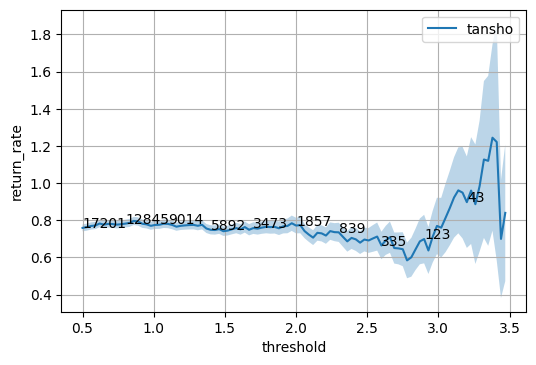

In [14]:
#回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='tansho')

## 5.2. 複数馬券
未実装

## 5.3. 複数threshold
未実装だが、以下のようなコードになる予定。

In [274]:
T1_RANGE = [2.5, 3.5]
MIN_T2 = 1
N_SAMPLES = 10

returns = {}
#「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
idx = 0
for i in tqdm(range(N_SAMPLES)):
    #T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold1 = T1_RANGE[1] * i / N_SAMPLES + T1_RANGE[0] * (1-(i/N_SAMPLES))
    for j in range(N_SAMPLES):
        #MIN_T2からthreshold1までをN_SAMPLES等分
        threshold2 = threshold1 * j / N_SAMPLES + MIN_T2 * (1-(j/N_SAMPLES))
        try:
            #print(threshold1, threshold2)
            #賭ける馬券を決定
            actions = keiba_ai.decide_action(
                    keiba_ai.datasets.X_test, #テストデータ
                    policies.StdScorePolicy, #「馬の勝ちやすさ」スコアを決める方針
                    policies.BetPolicyTanshoFukusho, #賭け方の方針(未実装)
                    threshold1=threshold1, #「馬の勝ちやすさスコア」の閾値
                    threshold2=threshold2
                    )
            returns[idx] = simulator.calc_returns(actions)
            idx += 1
        except Exception as e:
            print(e)
            break
returns_df = pd.DataFrame.from_dict(returns, orient='index')

  0%|          | 0/10 [00:00<?, ?it/s]

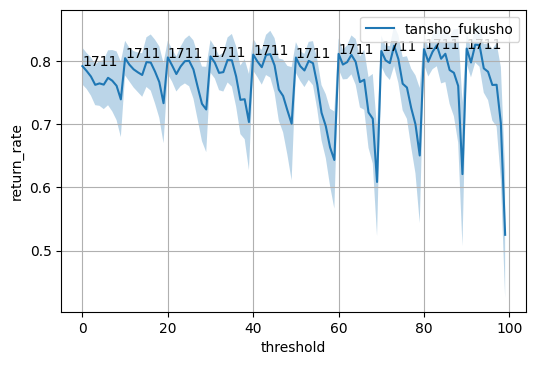

In [273]:
simulation.plot_single_threshold(returns_df.reset_index(), 100, label='tansho_fukusho')

# 6. 当日の予想
例として2022年1月8日のレースを実際に予想する場合を考える。  
https://race.netkeiba.com/top/race_list.html?kaisai_date=20220108

## 6.1. 前日準備

In [36]:
%autoreload

In [17]:
race_id_list = preparing.scrape_race_id_list(['20220108']) #レースidを取得
len(race_id_list)

getting race_id_list


  0%|          | 0/1 [00:00<?, ?it/s]

scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20220108


24

In [18]:
#出走するhorse_idの取得
html_files_race = preparing.scrape_html_race(race_id_list)
horse_id_list = preparing.get_rawdata_results(html_files_race)['horse_id'].unique()
len(horse_id_list)

  0%|          | 0/24 [00:00<?, ?it/s]

preparing raw results table


  0%|          | 0/24 [00:00<?, ?it/s]

361

In [19]:
#horse_resultsテーブルの更新
#直近レースが更新されている可能性があるので、skip=Falseにして上書きする
html_files_horse = preparing.scrape_html_horse_with_master(horse_id_list, skip=False)
horse_results_20220108 = preparing.get_rawdata_horse_results(html_files_horse)
preparing.update_rawdata(LocalPaths.RAW_HORSE_RESULTS_PATH, horse_results_20220108)

scraping


  0%|          | 0/361 [00:00<?, ?it/s]

updating master
preparing raw horse_results table


  0%|          | 0/361 [00:00<?, ?it/s]

In [23]:
#pedsテーブルの更新
html_files_peds = preparing.scrape_html_ped(horse_id_list, skip=True)
peds_20220108 = preparing.get_rawdata_peds(html_files_peds)
preparing.update_rawdata(LocalPaths.RAW_PEDS_PATH, peds_20220108)

  0%|          | 0/361 [00:00<?, ?it/s]

horse_id 2019105655 skipped
horse_id 2019104561 skipped
horse_id 2019104303 skipped
horse_id 2019100510 skipped
horse_id 2019101765 skipped
horse_id 2019100700 skipped
horse_id 2019100938 skipped
horse_id 2019105180 skipped
horse_id 2019103960 skipped
horse_id 2019102446 skipped
horse_id 2019102156 skipped
horse_id 2019104311 skipped
horse_id 2019100085 skipped
horse_id 2019104506 skipped
horse_id 2019100923 skipped
horse_id 2019100040 skipped
horse_id 2019103507 skipped
horse_id 2019105753 skipped
horse_id 2019105736 skipped
horse_id 2019102395 skipped
horse_id 2019104425 skipped
horse_id 2019103568 skipped
horse_id 2019105708 skipped
horse_id 2019106842 skipped
horse_id 2019103550 skipped
horse_id 2019100484 skipped
horse_id 2019101868 skipped
horse_id 2019101374 skipped
horse_id 2019109053 skipped
horse_id 2019103376 skipped
horse_id 2019103665 skipped
horse_id 2019106985 skipped
horse_id 2019102011 skipped
horse_id 2019102102 skipped
horse_id 2019106034 skipped
horse_id 2019105627 

0it [00:00, ?it/s]

ValueError: No objects to concatenate

In [27]:
#processorの更新
horse_results_processor = preprocessing.HorseResultsProcessor(
    filepath=LocalPaths.RAW_HORSE_RESULTS_PATH)
peds_processor = preprocessing.PedsProcessor(filepath=LocalPaths.RAW_PEDS_PATH)

In [32]:
#モデルの準備
keiba_ai = training.KeibaAIFactory.load('models/20220626/basemodel_2018_2021.pickle')

## 6.2. レース直前データ処理

In [28]:
%autoreload

In [29]:
filepath = 'data/tmp/shutuba.pickle' #一時的に出馬表を保存するパスを指定
preparing.scrape_shutuba_table(race_id_list[0], '2022/1/8', filepath) #馬体重が発表されたら、出馬表を取得
shutuba_table_processor = preprocessing.ShutubaTableProcessor(filepath) #出馬表の加工

In [30]:
#テーブルのマージ
shutuba_data_merger = preprocessing.ShutubaDataMerger(
    shutuba_table_processor,
    horse_results_processor,
    peds_processor,
    target_cols=TARGET_COLS,
    group_cols=GROUP_COLS
)

shutuba_data_merger.merge()

separating horse results by date


  0%|          | 0/1 [00:00<?, ?it/s]

merging horse_results


  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
#特徴量エンジニアリング
feature_enginnering_shutuba = preprocessing.FeatureEngineering(shutuba_data_merger)\
    .add_interval()\
        .dumminize_ground_state()\
            .dumminize_race_type()\
                .dumminize_sex()\
                    .dumminize_weather()\
                        .encode_horse_id()\
                            .encode_jockey_id()\
                                .dumminize_kaisai()

In [32]:
#予測
X = feature_enginnering_shutuba.featured_data.drop(['date'], axis=1)
keiba_ai.calc_score(X, policies.StdScorePolicy).sort_values('score', ascending=False)

,馬番,単勝,score
202206010201,5,4.7,1.972623
202206010201,3,4.3,1.698477
202206010201,15,4.5,1.292167
202206010201,4,5.7,0.754306
202206010201,11,5.4,0.706008
202206010201,6,16.9,0.401887
202206010201,16,14.2,-0.070303
202206010201,1,26.7,-0.260754
202206010201,13,29.8,-0.300251
202206010201,9,101.3,-0.481400
